# Importing Libraries

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import treebank
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

# Operating System Textbook


In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ninu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ninu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ninu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
file = open(r"OS.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = " ".join(wordslist)

In [29]:
#text

In [30]:
len(text)

1760214

# Preprocessing


In [31]:
import re

#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
#Converting the text into lower case         
cleantext = cleantext.lower()
cleantext = re.sub(r'[ ]?this page intentionally left blank[ ]?','',cleantext)
cleantext = re.sub(r'chapter[ ]?[0-9]+','',cleantext)
cleantext = re.sub(r'figure[ ]?[0-9]+','',cleantext)
cleantext = re.sub(r'preface','',cleantext)
cleantext = re.sub(r'^m{0,3}(cm|cd|d?c{0,3})(xc|xl|l?x{0,3})(ix|iv|v?i{0,3})$','',cleantext)
cleantext = re.sub(r'[ ]e[ ]','',cleantext)
cleantext = re.sub(r'[0-9]+','',cleantext)
cleantext = re.sub(r' www[a-z]+ ','',cleantext)
cleantext = re.sub(r' [^aci] ','',cleantext)


In [32]:
# cleantext

In [33]:
len(cleantext)

1660217

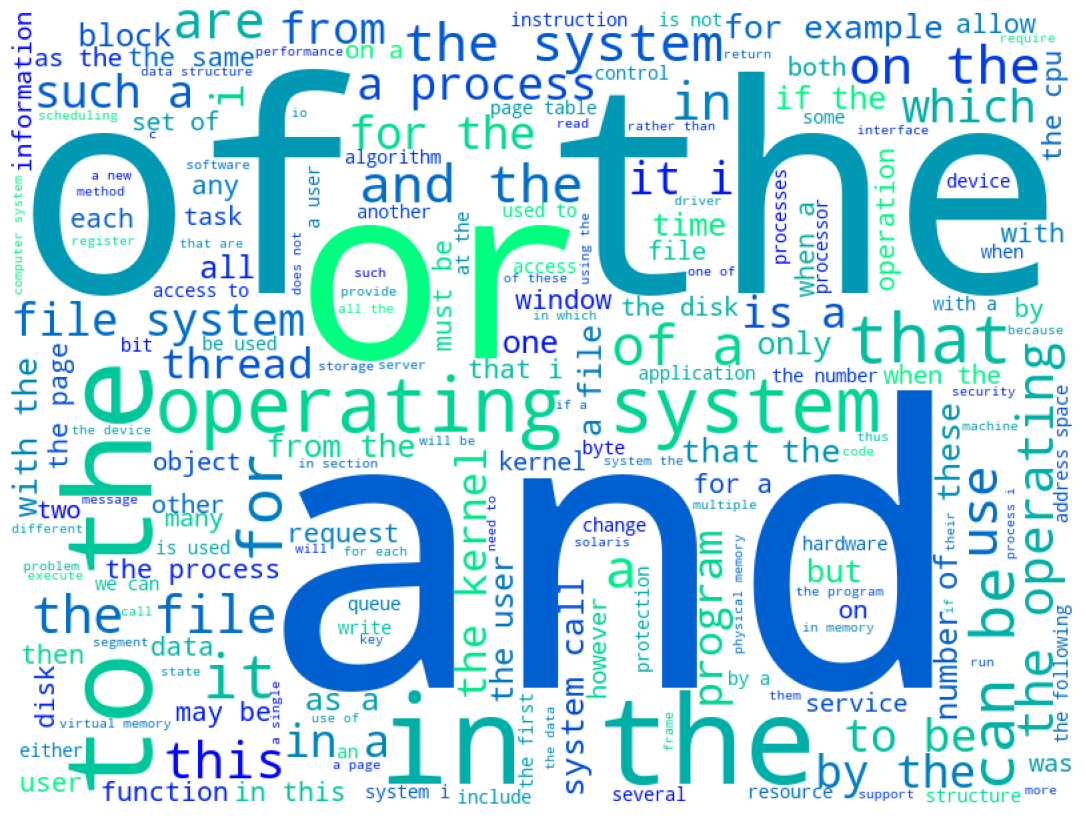

In [34]:
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

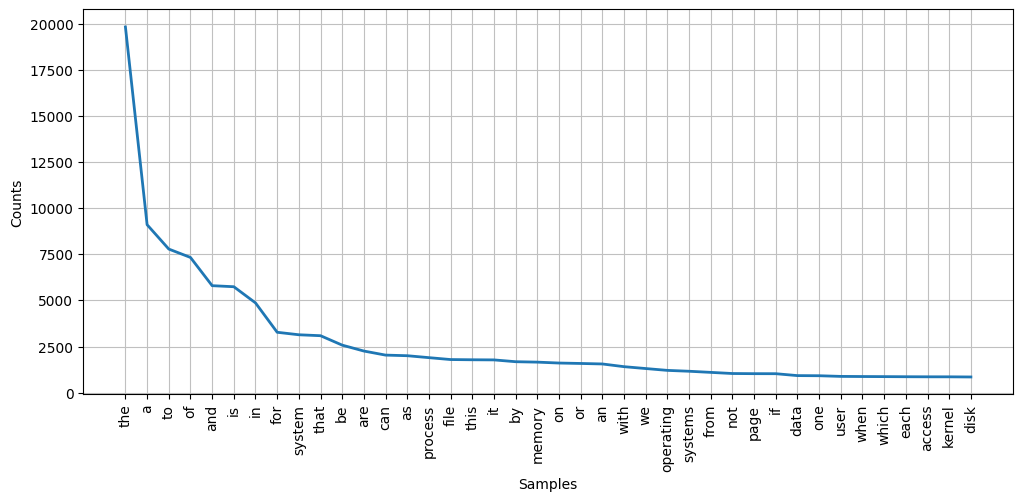

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [35]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [36]:
tokens = word_tokenize(cleantext)
# tokens

In [37]:
len(tokens)

270720

### Removing stopwords and tokenising

In [38]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

In [39]:
len(finaltext)

1390527

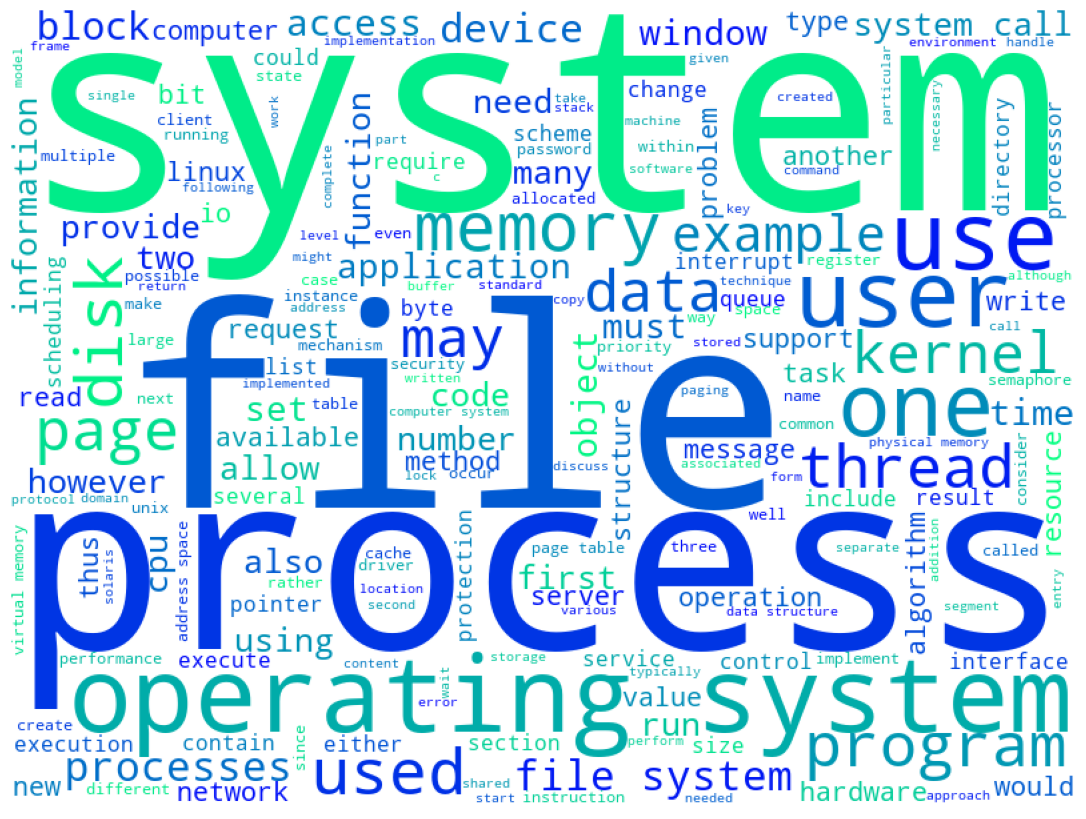

In [40]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Frequency distribution of tokens

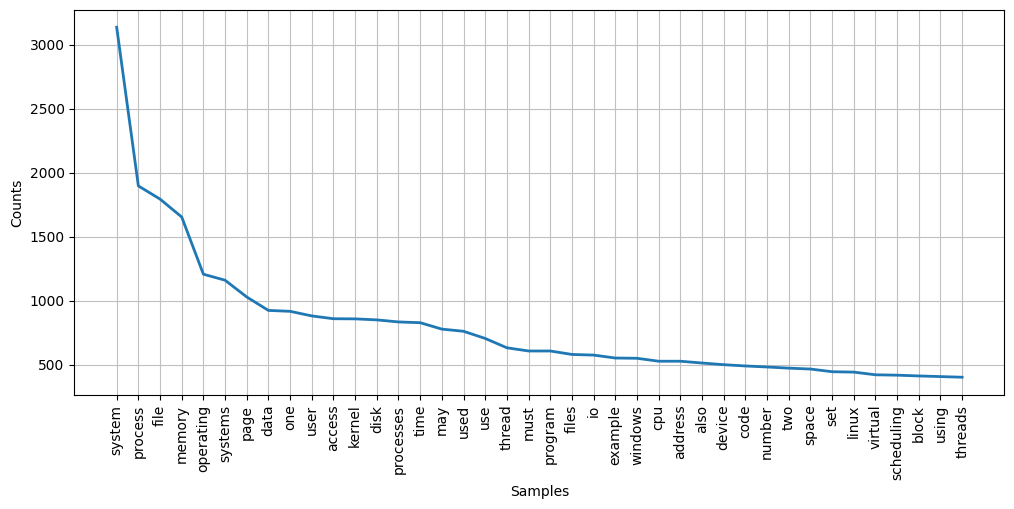

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [41]:
tokens = word_tokenize(finaltext)
tokens = [i for i in tokens if not i in stop_words]
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [42]:
tagged = nltk.pos_tag(tokens) 
# tagged

In [43]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 58850, 'JJ': 27437, 'NNS': 20912, 'VBG': 7948, 'VBP': 7622, 'RB': 7237, 'VBD': 5332, 'VBN': 5328, 'VBZ': 5187, 'VB': 3241, 'IN': 2069, 'MD': 2042, 'CD': 1816, 'DT': 537, 'JJR': 519, 'RBR': 314, 'JJS': 265, 'NNP': 212, 'CC': 200, 'FW': 177, 'RP': 83, 'PRP': 62, 'WRB': 54, 'WP$': 25, 'WP': 21, 'WDT': 20, 'RBS': 15, 'POS': 2, 'UH': 1, 'NNPS': 1, 'PRP$': 1})


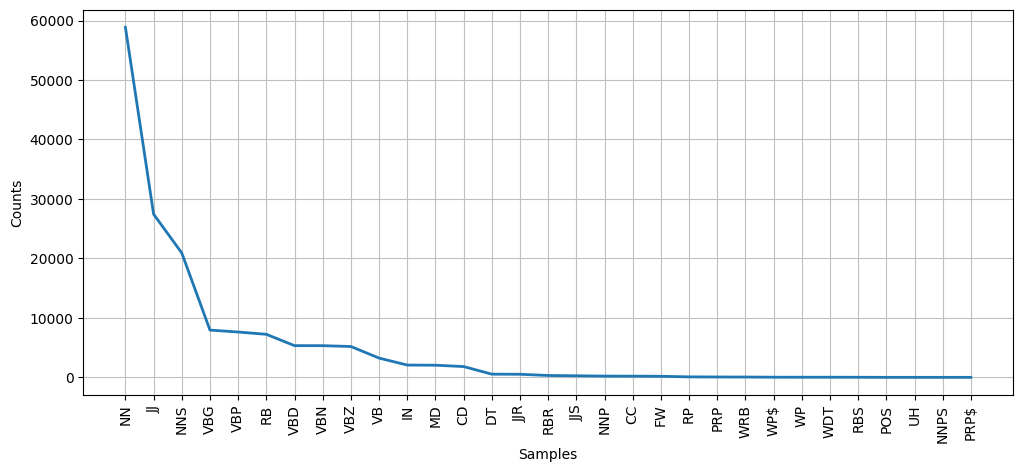

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [44]:
freq_tags = nltk.FreqDist(counts)
plt.figure(figsize=(12,5))
freq_tags.plot(40, cumulative=False)

## For word length vs Frequency distribution

In [45]:
import numpy as np
bin_size=np.linspace(0,25)

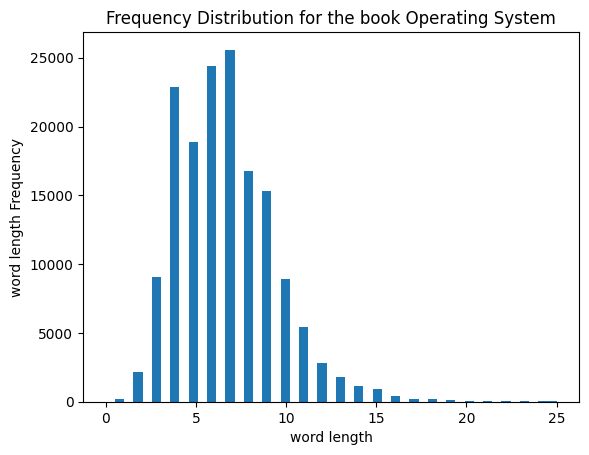

In [46]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book Operating System')
plt.show()
